In [1]:
import json
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Model evaluation

In [3]:
model = load_model('C:/ML_Data/pretrain_model_01.h5')

In [309]:
X_test = np.load('C:/ML_Data/0_data_pretrain_test/image_preprocess/T050.npy')
y_test = np.load('C:/ML_Data/0_data_pretrain_test/label_preprocess/T050.npy')

X_test = X_test.reshape(1, 512, 512, 3)

# Ensure masks are integer-encoded
y_test = (y_test / 255).astype(np.uint8)

y_test = y_test.reshape(1, 512, 512, 1)

model.evaluate(X_test, y_test)

# Predict on new images
predictions = model.predict(X_test)

1/1 [==============================] - 0s 33ms/step


In [311]:
predicted_labels = np.argmax(predictions, axis=-1) 

In [312]:
print("X_test[0] shape:", X_test[0].shape)  # Should be (512, 512, 3)
print("y_test[0] shape:", y_test[0].shape)  # Should be (512, 512) or (512, 512, 1)
print("predicted_labels[0] shape:", predicted_labels[0].shape) 

X_test[0] shape: (512, 512, 3)
y_test[0] shape: (512, 512, 1)
predicted_labels[0] shape: (512, 512)


In [313]:
print("Unique values in predicted labels:", np.unique(predicted_labels))
print("Unique values in ground truth:", np.unique(y_test))

Unique values in predicted labels: [0 1]
Unique values in ground truth: [0 1]


# Plot and save prediction result

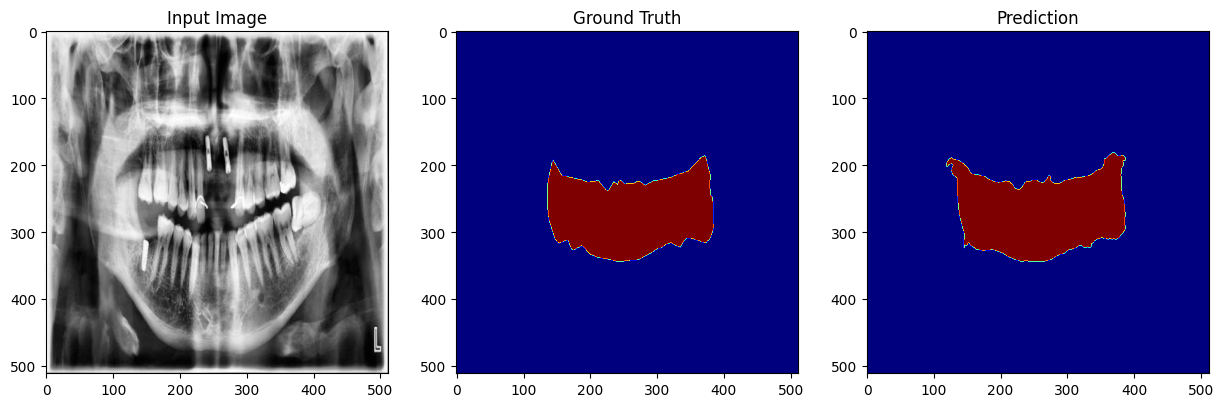

In [314]:
def plot_results(image, ground_truth, prediction):
    """Plot original image, ground truth mask, and predicted segmentation mask."""
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(image.squeeze(), cmap="gray")  # Show input image
    plt.title("Input Image")
    
    plt.subplot(1, 3, 2)
    plt.imshow(ground_truth.squeeze(), cmap="jet")  # Ground truth segmentation
    plt.title("Ground Truth")
    
    plt.subplot(1, 3, 3)
    plt.imshow(prediction.squeeze(), cmap="jet")  # Predicted segmentation
    plt.title("Prediction")
    
    plt.show()

# Convert predictions
predicted_labels = np.argmax(predictions, axis=-1)  # Shape (1, 512, 512)

# Show only the first sample
plot_results(X_test[0], y_test[0], predicted_labels[0])

In [315]:
# Assuming `predictions` is your model's output with shape (1, 512, 512, 4)
prediction_mask = np.argmax(predictions[0], axis=-1)  # Shape: (512, 512)

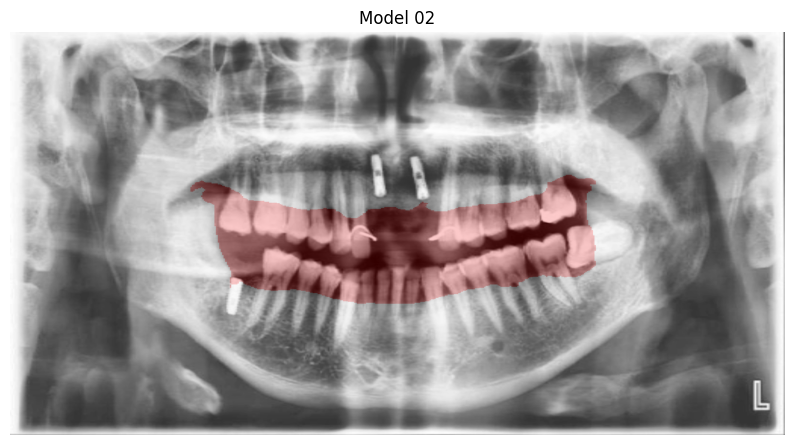

In [316]:
# Define the color map
color_map = {
    0: [255, 255, 255],  # White for background
    1: [255, 0, 0],      # Red for class 1
    2: [0, 255, 0],      # Green for class 2
    3: [0, 0, 255]       # Blue for class 3
}

# Assuming X_test[0] is the original image and prediction_mask is the segmentation mask
original_size = (1615, 840)  # Width x Height

# Resize the image and mask to match the original dimensions
resized_image = cv2.resize(X_test[0], original_size, interpolation=cv2.INTER_LINEAR)
resized_mask = cv2.resize(prediction_mask, original_size, interpolation=cv2.INTER_NEAREST)

# Create an RGB image from the resized prediction mask
rgb_mask = np.zeros((original_size[1], original_size[0], 3), dtype=np.uint8)
for class_idx, color in color_map.items():
    rgb_mask[resized_mask == class_idx] = color

# Plot and save
plt.figure(figsize=(10, 10))
plt.imshow(resized_image, cmap='gray')  # Display the resized original image
plt.imshow(rgb_mask, alpha=0.2)  # Overlay the resized mask
plt.axis('off')
plt.title("Model 02")

# Save image
plt.savefig("model2_T050.png", dpi=300, bbox_inches='tight', format='png')  # Save as PNG

# Display image
plt.show()